In [31]:
import pandas as pd
from scipy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Cargar el DataFrame df_user_items desde un archivo CSV
df_user_items=pd.read_csv('dataset\df_user_dummies.csv')
# Establecer el DataFrame df_users con 'user_id' como índice
df_users=df_user_items.set_index('user_id')

In [13]:
df_user_items.head(5)

,user_id,video production,accounting,animation &amp; modeling,utilities,software training,simulation,indie,strategy,audio production,...,education,massively multiplayer,action,free to play,racing,adventure,design &amp; illustration,web publishing,sports,early access
0,--000--,0.0,0.0,0.0,0.0,0.0,0.086207,0.396552,0.103448,0.0,...,0.0,0.172414,0.672414,0.482759,0.000000,0.137931,0.0,0.0,0.051724,0.051724
1,--ace--,0.0,0.0,0.0,0.0,0.0,0.113636,0.659091,0.136364,0.0,...,0.0,0.022727,0.545455,0.363636,0.022727,0.250000,0.0,0.0,0.022727,0.000000
2,--ionex--,0.0,0.0,0.0,0.0,0.0,0.130435,0.391304,0.086957,0.0,...,0.0,0.130435,0.695652,0.434783,0.000000,0.260870,0.0,0.0,0.000000,0.000000
3,-2SV-vuLB-Kg,0.0,0.0,0.0,0.0,0.0,0.044118,0.455882,0.176471,0.0,...,0.0,0.014706,0.455882,0.058824,0.029412,0.323529,0.0,0.0,0.029412,0.029412
4,-404PageNotFound-,0.0,0.0,0.0,0.0,0.0,0.060403,0.248322,0.093960,0.0,...,0.0,0.174497,0.651007,0.288591,0.013423,0.187919,0.0,0.0,0.026846,0.026846


In [14]:
# Realizar la descomposición de valores singulares (SVD)
U,s,V_transp=svd(df_users, full_matrices=False)

In [15]:
len(s)

22

In [16]:
# Calcular la varianza explicada por cada valor singular y graficarla
sigma_s=[]
for i in range(len(s)):
    a=(s[i]/sum(s))*100
    sigma_s.append(a)

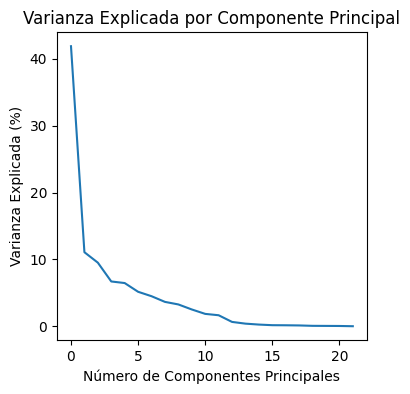

In [17]:
plt.figure(figsize=(4, 4))
plt.plot([x for x in range(len(sigma_s))], sigma_s)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada (%)')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

In [18]:
# Sumar la varianza explicada de los primeros 10 componentes principales para confirmar el porcentaje de informacion que representan
total_varianza_explicada = sum(sigma_s[0:10])
total_varianza_explicada

94.6787499053627

In [19]:
# Seleccionar el número de componentes principales (k)
k = 9  # porque representan el 94.6% de los datos

In [20]:
# Obtener la matriz de usuarios reducida
matriz_usuarios=U[:, :k]
matriz_usuarios_df=pd.DataFrame(np.round(matriz_usuarios,5))
matriz_usuarios_df

,0,1,2,3,4,5,6,7,8
0,-0.00461,0.00347,0.00146,-0.00119,-0.00049,-0.00092,0.00339,-0.00207,0.00230
1,-0.00460,0.00186,-0.00556,-0.00112,0.00660,0.00395,0.00443,-0.00502,0.00132
2,-0.00477,0.00223,0.00060,0.00081,0.00141,0.00140,-0.00054,-0.00292,0.00381
3,-0.00342,-0.00282,-0.00449,0.00219,0.00231,0.00415,0.00215,-0.00085,-0.00301
4,-0.00391,0.00044,0.00291,0.00073,-0.00169,-0.00061,0.00035,-0.00038,-0.00082
...,...,...,...,...,...,...,...,...,...
70907,-0.00337,0.00209,-0.00224,0.00521,-0.00700,-0.00907,0.01038,-0.01553,0.00244
70908,-0.00465,0.00939,-0.00180,-0.00078,-0.00453,0.00483,0.00607,0.00250,0.00331
70909,-0.00572,0.00501,0.00045,0.00259,-0.00125,-0.00033,-0.00286,-0.00643,-0.00590
70910,-0.00283,-0.00212,0.00189,-0.00079,0.00101,0.00114,-0.00081,0.00078,0.00048


In [21]:
# Obtener la matriz de elementos reducida
matriz_elementos=V_transp[:k, :]
matriz_elementos_df=pd.DataFrame(np.round(matriz_elementos, 5))
matriz_elementos_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.00107,0.0,-0.00137,-0.00168,-0.00025,-0.13417,-0.42727,-0.14180,-0.00016,-0.21716,...,-0.00039,-0.14601,-0.72072,-0.31528,-0.01853,-0.27082,-0.00146,-0.00056,-0.02748,-0.03197
1,0.00087,-0.0,0.00091,-0.00014,-0.00015,-0.03695,0.02476,-0.16801,0.00005,-0.00960,...,0.00013,0.34597,-0.37309,0.81882,-0.01561,-0.14100,0.00059,-0.00019,0.01767,0.01372
2,-0.00077,-0.0,-0.00138,-0.00006,-0.00043,-0.27399,-0.66401,-0.21282,-0.00003,-0.13355,...,-0.00056,0.09896,0.55187,0.16255,-0.00244,-0.22628,-0.00177,-0.00086,-0.00875,-0.01470
3,-0.00027,-0.0,-0.00030,-0.00061,0.00003,-0.45191,-0.11905,-0.41117,-0.00012,0.41650,...,-0.00017,0.06586,-0.11784,-0.08955,-0.03119,0.62796,0.00008,0.00010,-0.04599,-0.02749
4,0.00098,-0.0,0.00068,0.00032,-0.00010,-0.08874,0.31100,-0.54936,0.00011,-0.63395,...,-0.00018,-0.34561,0.11483,0.04008,0.01156,0.07761,-0.00002,-0.00049,0.02656,-0.03024
5,0.00014,0.0,0.00037,0.00075,0.00014,-0.27475,-0.26918,0.61630,0.00001,-0.31751,...,0.00026,-0.19786,-0.04393,0.15934,0.00122,0.31691,0.00058,0.00033,0.05529,-0.03599
6,-0.00185,-0.0,-0.00139,-0.00178,0.00002,-0.73117,0.38737,0.15676,-0.00022,0.19367,...,0.00014,-0.20392,0.03164,0.02837,-0.05393,-0.44170,-0.00051,0.00032,-0.05634,-0.05379
7,-0.00013,0.0,-0.00039,0.00002,-0.00029,-0.11342,0.10875,0.16324,0.00023,-0.29680,...,-0.00010,-0.02318,-0.07109,0.20416,-0.05445,0.39472,-0.00050,-0.00012,-0.20641,0.02003
8,0.00108,-0.0,0.00149,-0.00027,-0.00009,0.24776,-0.16817,-0.06396,0.00002,0.35979,...,0.00033,-0.77948,-0.01264,0.35047,0.00053,0.00172,0.00215,0.00094,-0.03168,-0.19297


In [22]:
# Realizar predicciones de afinidad
gustos_predichos=np.dot(matriz_usuarios, matriz_elementos)
gustos_predichos_df=pd.DataFrame(np.round(gustos_predichos,5), columns=df_users.columns)
gustos_predichos_df

,video production,accounting,animation &amp; modeling,utilities,software training,simulation,indie,strategy,audio production,rpg,...,education,massively multiplayer,action,free to play,racing,adventure,design &amp; illustration,web publishing,sports,early access
0,0.00000,-0.0,0.00001,0.00000,0.00000,-0.00075,0.00202,0.00000,-0.00000,0.00298,...,0.00000,-0.00014,0.00319,0.00496,-0.00001,-0.00295,0.00001,0.00000,0.00033,-0.00041
1,0.00001,-0.0,0.00002,0.00001,0.00000,-0.00144,0.00778,0.00058,-0.00000,-0.00135,...,0.00001,-0.00419,0.00075,0.00262,0.00022,-0.00063,0.00002,0.00001,0.00140,-0.00065
2,0.00001,-0.0,0.00002,0.00001,0.00000,0.00118,0.00049,-0.00087,0.00000,0.00207,...,0.00000,-0.00197,0.00308,0.00435,0.00023,0.00099,0.00002,0.00001,0.00076,-0.00071
3,-0.00000,-0.0,0.00000,0.00001,0.00000,-0.00277,0.00496,0.00269,-0.00000,-0.00091,...,0.00000,-0.00047,0.00103,-0.00257,0.00001,0.00392,0.00001,0.00000,0.00042,0.00031
4,-0.00000,-0.0,-0.00000,0.00000,-0.00000,-0.00072,-0.00047,0.00016,0.00000,0.00191,...,-0.00000,0.00234,0.00405,0.00148,0.00002,0.00017,-0.00000,-0.00000,0.00006,0.00027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70907,-0.00002,-0.0,-0.00000,-0.00003,0.00001,-0.00348,0.00454,-0.00434,-0.00001,0.01799,...,0.00000,0.00189,0.00080,-0.00180,0.00007,-0.00973,0.00001,0.00001,0.00176,-0.00078
70908,0.00000,-0.0,0.00001,-0.00000,0.00000,-0.00371,0.00287,0.00640,0.00000,0.00380,...,0.00001,0.00043,-0.00181,0.01136,-0.00054,-0.00066,0.00002,0.00001,-0.00047,-0.00063
70909,0.00001,-0.0,0.00001,0.00001,0.00000,0.00085,0.00085,-0.00183,-0.00000,0.00234,...,0.00000,0.00861,0.00251,0.00218,0.00043,0.00088,0.00000,-0.00000,0.00175,0.00139
70910,0.00000,-0.0,0.00000,0.00001,-0.00000,0.00051,-0.00031,0.00080,0.00000,-0.00117,...,0.00000,-0.00099,0.00394,0.00006,0.00012,0.00124,0.00000,0.00000,0.00002,-0.00005


In [23]:
# Concatenar 'user_id' y las predicciones de afinidad en un nuevo DataFrame
gustos_predichos_df=pd.concat([df_user_items[['user_id']],gustos_predichos_df], axis=1)

In [24]:
# Guardado del DataFrame resultante en un archivo CSV
gustos_predichos_df.to_csv('Matriz_recomendacios.csv', index=False)